# AIA Map Animations

In [1]:
from IPython.display import HTML

import numpy as np
import astropy.units as u
from astropy.visualization import ImageNormalize,SqrtStretch
from sunpy.map import Map
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.animation

import synthesizAR
#from synthesizAR.visualize import plot_aia_channels,make_aia_animation

%matplotlib inline

## Cooling--out of phase
Make an animation of one of our channels from the "arcade" LOS viewing angle.

In [76]:
fits_format = '/storage-home/w/wtb2/data/timelag_synthesis_v2/cooling_outofphase/nei/{los}/SDO_AIA/{channel}/map_t{i_time:06d}.fits'

In [77]:
norm = ImageNormalize(vmin=0,vmax=1e3,stretch=SqrtStretch())

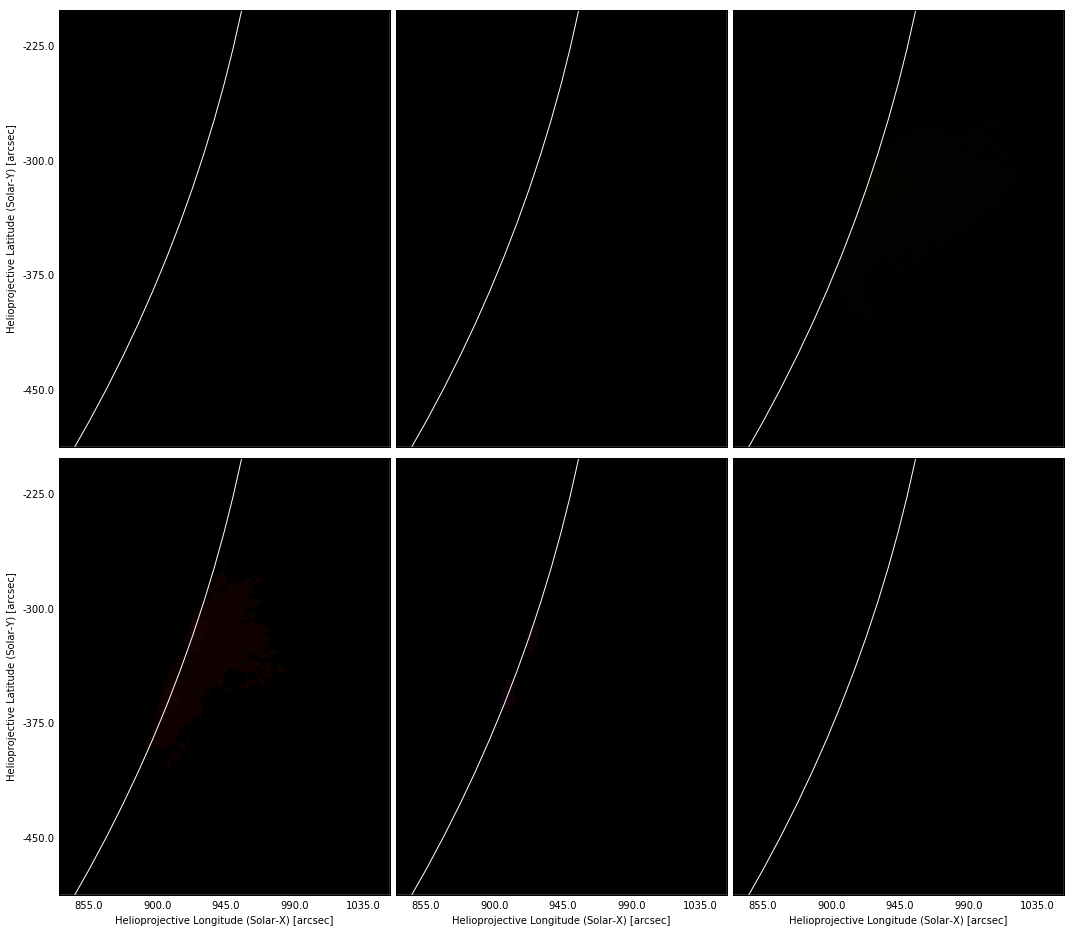

In [78]:
fig = plt.figure(figsize=(3 * 6, 2 * 6 * 1.36))
ims = {}
for i,chan in enumerate(['94', '131', '171', '193', '211', '335']):
    m = Map(fits_format.format(channel=chan,i_time=0,los='off_limb'))
    # m = m.rotate(180*u.deg,)
    ax = fig.add_subplot(2,3,i+1,projection=m)
    ims[chan] = m.plot(norm=norm,axes=ax,title=False)
    #hgs_grid = m.draw_grid(axes=ax,color='w',grid_spacing=10*u.deg)
    m.draw_limb(axes=ax)
    ax.grid(alpha=0)
    if i%3 != 0:
        ax.coords[1].set_ticks_visible(False)
        ax.coords[1].set_ticklabel_visible(False)
        ax.coords[1].set_axislabel('')
    if i < 3:
        ax.coords[0].set_ticks_visible(False)
        ax.coords[0].set_ticklabel_visible(False)
        ax.coords[0].set_axislabel('')
plt.subplots_adjust(wspace=0.02,hspace=0.02)

In [79]:
def animate(i):
    for chan in ['94', '131', '171', '193', '211', '335']:
        # Read in map
        m = Map(fits_format.format(channel=chan, i_time=i, los='off_limb'))
        # rotate
        # m = m.rotate(180 * u.deg)
        # update data
        ims[chan].set_data(m.data)
    # set title with time
    fig.suptitle(f"$t = {m.meta['t_obs']}$ {m.meta['tunit']}")
    
    return [ims[k] for k in ims] 

In [80]:
anim = matplotlib.animation.FuncAnimation(
    fig, animate, repeat=True, frames=range(1000),
    interval=50, blit=True, repeat_delay=0,
)

In [81]:
HTML(anim.to_html5_video())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## High Frequency

In [29]:
field = synthesizAR.Skeleton.restore('/storage-home/w/wtb2/data/timelag_synthesis/high_frequency/field_checkpoint/')

No HMI fits file supplied. A new HMI map object will not be created.
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev531-py3.6.egg/synthesizAR/field.py:187: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  lcx, rcx = self.hmi_map.xrange + self.hmi_map.scale.axis1*u.Quantity([boundary_clipping[0], -boundary_clipping[0]], u.pixel)
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev531-py3.6.egg/synthesizAR/field.py:188: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  lcy, rcy = self.hmi_map.yrange + self.hmi_map.scale.axis2*u.Quantity([boundary_clipping[1], -boundary_clipping[1]], u.pixel)
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev531-py3.6.egg/synthesizAR/field.py:195: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  bbox = np.array([self._convert_angle_to_length(self

In [30]:
aia = InstrumentSDOAIA([0,30000]*u.s,use_temperature_response_functions=False)
observer = synthesizAR.Observer(field,[aia],parallel=True)

In [31]:
observer.build_detector_files('/storage-home/w/wtb2/data/timelag_synthesis/high_frequency/nei/',
                              ds=field._convert_angle_to_length(1.*u.arcsec))

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:299: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:299: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev531-py3.6.egg/synthesizAR/instruments/base.py:116: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  delta_x = np.fabs(field.clipped_hmi_map.xrange[1] - field.clipped_hmi_map.xrange[0])
/storage-home/w/wtb2/anaconda3/envs/synthesizar/li

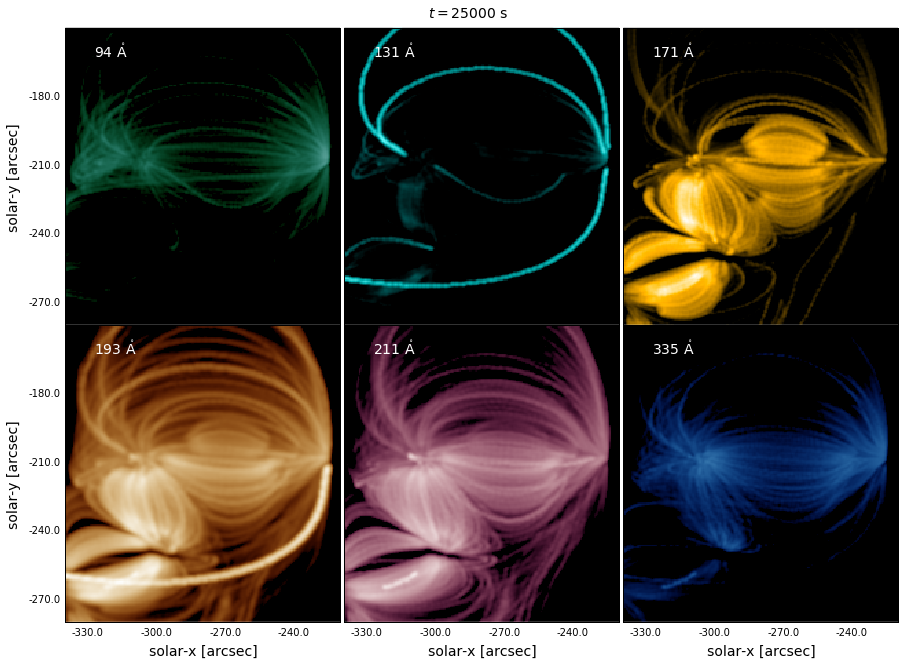

In [47]:
plot_aia_channels(aia,25000*u.s,'/storage-home/w/wtb2/data/timelag_synthesis/high_frequency/nei/',
                  figsize=(15,10),
                  norm=matplotlib.colors.SymLogNorm(1e-6,vmin=5,vmax=1e3),
                  corners=corners)

In [ ]:
ani = make_aia_animation(aia,start_time=10000*u.s,stop_time=15000*u.s,
                         root_dir='/storage-home/w/wtb2/data/timelag_synthesis/high_frequency/nei/',figsize=(15,9.79),
                         norm=matplotlib.colors.SymLogNorm(1e-6,vmin=5,vmax=1e3))

In [ ]:
ani.save('noaa1158_high_frequency.mp4')

## Intermediate Frequency

In [ ]:
field = synthesizAR.Skeleton.restore('/storage-home/w/wtb2/data/timelag_synthesis/intermediate_frequency/field_checkpoint/')

In [ ]:
aia = InstrumentSDOAIA([0,30000]*u.s,use_temperature_response_functions=False)
observer = synthesizAR.Observer(field,[aia],parallel=True)

In [ ]:
observer.build_detector_files('/storage-home/w/wtb2/data/timelag_synthesis/intermediate_frequency/nei/',
                              ds=field._convert_angle_to_length(1.*u.arcsec))

In [ ]:
ani = make_aia_animation(aia,start_time=10000*u.s,stop_time=15000*u.s,
                         root_dir='/storage-home/w/wtb2/data/timelag_synthesis/intermediate_frequency/nei/',figsize=(15,9.79),
                         norm=matplotlib.colors.SymLogNorm(1e-6,vmin=5,vmax=1e3))

## Low Frequency

In [ ]:
field = synthesizAR.Skeleton.restore('/storage-home/w/wtb2/data/timelag_synthesis/low_frequency/field_checkpoint/')

In [ ]:
aia = InstrumentSDOAIA([0,30000]*u.s,use_temperature_response_functions=False)
observer = synthesizAR.Observer(field,[aia],parallel=True)

In [ ]:
observer.build_detector_files('/storage-home/w/wtb2/data/timelag_synthesis/low_frequency/nei/',
                              ds=field._convert_angle_to_length(1.*u.arcsec))

In [ ]:
plot_aia_channels(aia,10000*u.s,'/storage-home/w/wtb2/data/timelag_synthesis/low_frequency/nei/',figsize=(15,9.79),
                  norm=matplotlib.colors.SymLogNorm(1e-6,vmin=5,vmax=1e3))

In [ ]:
ani = make_aia_animation(aia,start_time=10000*u.s,stop_time=15000*u.s,
                         root_dir='/storage-home/w/wtb2/data/timelag_synthesis/low_frequency/nei/',figsize=(15,9.79),
                         norm=matplotlib.colors.SymLogNorm(1e-6,vmin=5,vmax=1e3))

In [ ]:
ani.save('noaa1158_low_frequency.mp4')